In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 18.24 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 16.6 MB/s eta 0:00:00


In [ ]:
import torch
import os
import shutil
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import json
import shutil
from tqdm import tqdm

# Define paths
datafolder = "/content/drive/MyDrive/val2017"  # Folder containing image files
json_path = "/content/drive/MyDrive/instances_val2017/instances_val2017.json"  # Path to COCO JSON file
output_dir = "/content/datayolo"  # YOLO dataset output directory

# Create YOLO directory structure
os.makedirs(f"{output_dir}/train/images", exist_ok=True)
os.makedirs(f"{output_dir}/train/labels", exist_ok=True)
os.makedirs(f"{output_dir}/val/images", exist_ok=True)
os.makedirs(f"{output_dir}/val/labels", exist_ok=True)
os.makedirs(f"{output_dir}/test/images", exist_ok=True)
os.makedirs(f"{output_dir}/test/labels", exist_ok=True)

# Supported YOLO classes (COCO's first 80 classes)
yolo_coco_classes = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog",
    "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag",
    "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
    "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon",
    "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut",
    "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book",
    "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]
category_mapping = {cat['id']: idx for idx, cat in enumerate(json.load(open(json_path))["categories"]) if cat['name'] in yolo_coco_classes}

# Load COCO JSON data
with open(json_path, "r") as f:
    coco_data = json.load(f)

# Map images to their metadata
image_data = {
    img["id"]: {"file_name": img["file_name"], "width": img["width"], "height": img["height"], "bboxes": []}
    for img in coco_data["images"]
}

# Filter and add annotations
for ann in coco_data["annotations"]:
    if ann["category_id"] in category_mapping:  # Only include YOLO-supported classes
        class_id = category_mapping[ann["category_id"]]
        bbox = ann["bbox"]  # x, y, width, height
        image_data[ann["image_id"]]["bboxes"].append((class_id, bbox))

# Prepare the YOLO dataset
for i, (image_id, data) in tqdm(enumerate(image_data.items()), desc="Preparing YOLO dataset"):
    width, height = data["width"], data["height"]
    name = os.path.splitext(data["file_name"])[0]
    src = os.path.join(datafolder, data["file_name"])

    if i < 4000:  # Train set
        dst_img = f"{output_dir}/train/images/{name}.jpg"
        dst_label = f"{output_dir}/train/labels/{name}.txt"
    elif i < 4500:  # Validation set
        dst_img = f"{output_dir}/val/images/{name}.jpg"
        dst_label = f"{output_dir}/val/labels/{name}.txt"
    #elif i < 200:  # Test set
    else:
        dst_img = f"{output_dir}/test/images/{name}.jpg"
        dst_label = f"{output_dir}/test/labels/{name}.txt"
    #else:
       # continue

    if not os.path.exists(src):
        print(f"Image not found: {src}. Skipping...")
        continue

    shutil.copyfile(src, dst_img)

    with open(dst_label, "w") as f:
        for class_id, box in data["bboxes"]:
            x, y, w, h = box
            x_center = (x + w / 2) / width
            y_center = (y + h / 2) / height
            norm_width = w / width
            norm_height = h / height
            f.write(f"{class_id} {x_center} {y_center} {norm_width} {norm_height}\n")

# Generate data.yaml
data_yaml = f"""train: ../datayolo/train/images
val: ../datayolo/val/images

nc: 80
names: {yolo_coco_classes}
"""
with open(f"{output_dir}/data.yaml", "w") as f:
    f.write(data_yaml)

print("Dataset preparation completed successfully!")


Preparing YOLO dataset: 132it [00:36,  6.77it/s]

Image not found: /content/drive/MyDrive/val2017/000000494869.jpg. Skipping...
Image not found: /content/drive/MyDrive/val2017/000000329219.jpg. Skipping...


Preparing YOLO dataset: 137it [00:36,  7.71it/s]

Image not found: /content/drive/MyDrive/val2017/000000127182.jpg. Skipping...


Preparing YOLO dataset: 495it [01:47,  5.47it/s]

Image not found: /content/drive/MyDrive/val2017/000000520301.jpg. Skipping...


Preparing YOLO dataset: 756it [02:39,  7.56it/s]

Image not found: /content/drive/MyDrive/val2017/000000131273.jpg. Skipping...
Image not found: /content/drive/MyDrive/val2017/000000472375.jpg. Skipping...


Preparing YOLO dataset: 1151it [03:56,  6.25it/s]

Image not found: /content/drive/MyDrive/val2017/000000462614.jpg. Skipping...


Preparing YOLO dataset: 1271it [04:18,  7.14it/s]

Image not found: /content/drive/MyDrive/val2017/000000419974.jpg. Skipping...


Preparing YOLO dataset: 1392it [04:41,  5.54it/s]

Image not found: /content/drive/MyDrive/val2017/000000061471.jpg. Skipping...
Image not found: /content/drive/MyDrive/val2017/000000170893.jpg. Skipping...


Preparing YOLO dataset: 1397it [04:42,  5.81it/s]

Image not found: /content/drive/MyDrive/val2017/000000498286.jpg. Skipping...


Preparing YOLO dataset: 1527it [05:07,  6.29it/s]

Image not found: /content/drive/MyDrive/val2017/000000078823.jpg. Skipping...


Preparing YOLO dataset: 1648it [05:31,  6.85it/s]

Image not found: /content/drive/MyDrive/val2017/000000522007.jpg. Skipping...


Preparing YOLO dataset: 2052it [06:48,  6.07it/s]

Image not found: /content/drive/MyDrive/val2017/000000067213.jpg. Skipping...


Preparing YOLO dataset: 2423it [08:01,  5.92it/s]

Image not found: /content/drive/MyDrive/val2017/000000407614.jpg. Skipping...


Preparing YOLO dataset: 2547it [08:26,  6.56it/s]

Image not found: /content/drive/MyDrive/val2017/000000365207.jpg. Skipping...


Preparing YOLO dataset: 2809it [09:19,  8.44it/s]

Image not found: /content/drive/MyDrive/val2017/000000065485.jpg. Skipping...
Image not found: /content/drive/MyDrive/val2017/000000482100.jpg. Skipping...


Preparing YOLO dataset: 2936it [09:55,  6.52it/s]

Image not found: /content/drive/MyDrive/val2017/000000424162.jpg. Skipping...


Preparing YOLO dataset: 3070it [10:22,  6.88it/s]

Image not found: /content/drive/MyDrive/val2017/000000575970.jpg. Skipping...


Preparing YOLO dataset: 3205it [10:49,  5.47it/s]

Image not found: /content/drive/MyDrive/val2017/000000554002.jpg. Skipping...


Preparing YOLO dataset: 3209it [10:49,  4.99it/s]

Image not found: /content/drive/MyDrive/val2017/000000061108.jpg. Skipping...


Preparing YOLO dataset: 3447it [11:35,  7.64it/s]

Image not found: /content/drive/MyDrive/val2017/000000565776.jpg. Skipping...


Preparing YOLO dataset: 3587it [12:02,  7.52it/s]

Image not found: /content/drive/MyDrive/val2017/000000404484.jpg. Skipping...


Preparing YOLO dataset: 3711it [12:26,  4.66it/s]

Image not found: /content/drive/MyDrive/val2017/000000540502.jpg. Skipping...


Preparing YOLO dataset: 3828it [12:49,  4.81it/s]

Image not found: /content/drive/MyDrive/val2017/000000289343.jpg. Skipping...
Image not found: /content/drive/MyDrive/val2017/000000068078.jpg. Skipping...


Preparing YOLO dataset: 4054it [13:32,  6.23it/s]

Image not found: /content/drive/MyDrive/val2017/000000579321.jpg. Skipping...


Preparing YOLO dataset: 4056it [13:33,  6.30it/s]

Image not found: /content/drive/MyDrive/val2017/000000279278.jpg. Skipping...


Preparing YOLO dataset: 5000it [16:37,  5.01it/s]

Dataset preparation completed successfully!


In [ ]:
# Train YOLOv5 on the prepared dataset
!python train.py --img 640 --batch 16 --epochs 10 --data ../datayolo/data.yaml --weights yolov5s.pt --name yolov5_custom

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
        0/9      3.76G     0.0468    0.06998    0.02337        240        640:  24% 59/249 [00:37<01:19,  2.40it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        0/9      3.76G    0.04679    0.06987     0.0234        175        640:  24% 60/249 [00:37<01:32,  2.05it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        0/9      3.76G    0.04685    0.07033    0.02348        287        640:  24% 61/249 [00:38<01:20,  2.35it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [ ]:
from IPython.display import display
from PIL import Image as PILImage
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob
from IPython.display import display, Image as IPImage

In [ ]:
weights_path = "runs/train/yolov5_custom/weights/best.pt"
test_images_dir = "/content/datayolo/test/images"

output_dir = "/content/yolo_test_results"  # New directory for output results

source_image = "/content/Screenshot 2024-12-02 162107.png"
#source_image = "/content/drive/MyDrive/val2017/000000000139.jpg"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Run YOLOv5 detection
!python detect.py --weights $weights_path --source $source_image --project $output_dir --name results --exist-ok

# Get the path to the detected image
detected_image_path = os.path.join(output_dir, "results", os.path.basename(source_image))

# Display the detected image
if os.path.exists(detected_image_path):
    print(f"Detected image saved at: {detected_image_path}")

    # Display using Matplotlib
    img = cv2.imread(detected_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print(f"Detection failed. Detected image not found at: {detected_image_path}")


usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE] [--data DATA]
                 [--imgsz IMGSZ [IMGSZ ...]] [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img] [--save-txt]
                 [--save-format SAVE_FORMAT] [--save-csv] [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms] [--augment] [--visualize]
                 [--update] [--project PROJECT] [--name NAME] [--exist-ok]
                 [--line-thickness LINE_THICKNESS] [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: 2024-12-02 162107.png
Detection failed. Detected image not found at: /content/yolo_test_results/results/Screenshot 2024-12-02 162107.png


detect: weights=['runs/train/yolov5_custom/weights/best.pt'], source=/content/datayolo/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/test, name=yolov5_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/500 /content/datayolo/test/images/000000000632.jpg: 512x640 1 bottle, 1 chair, 2 potted plants, 1 bed, 1 book, 1 vase, 31.5ms
image 2/500 /content/datayolo/test/images/000000002006.jpg: 480x640 3 persons, 1 bus, 46.5ms
image 3/500 /content/

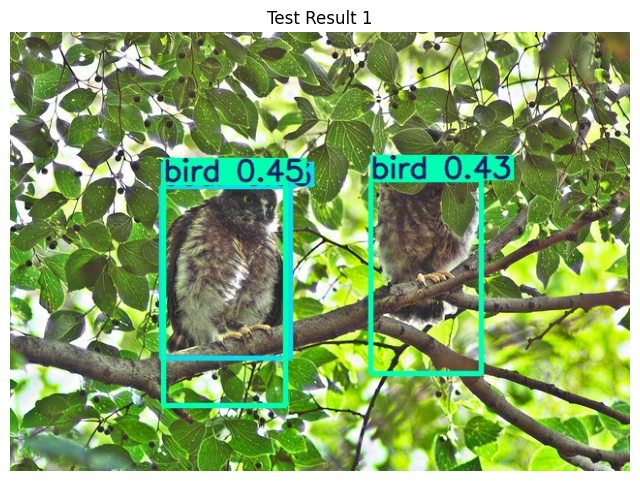

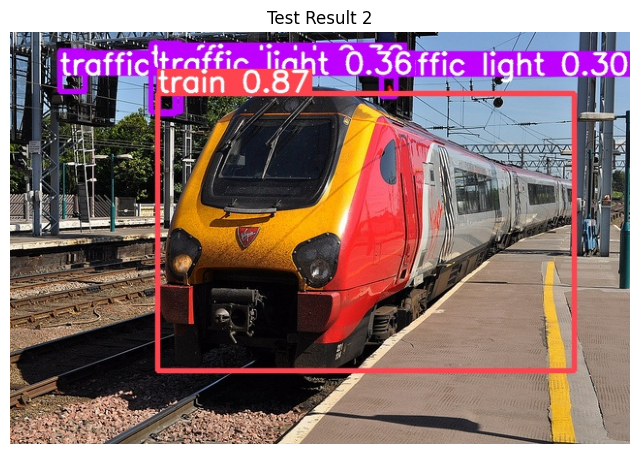

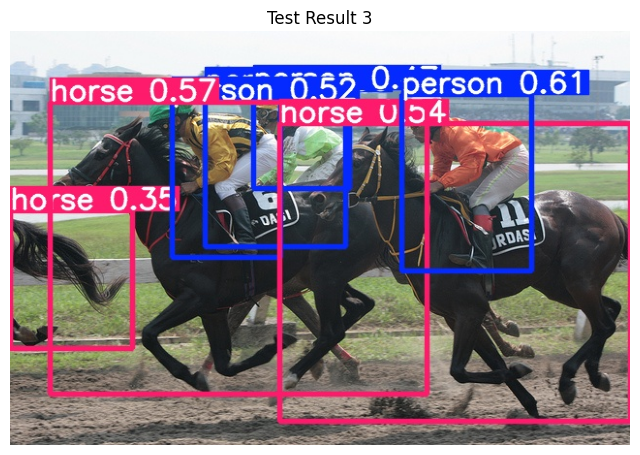

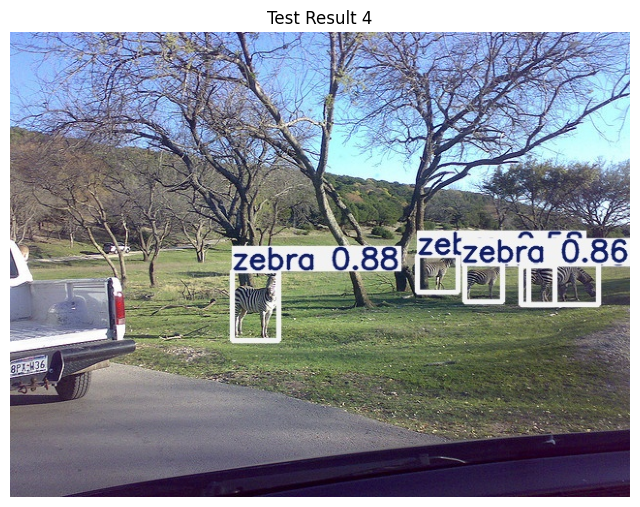

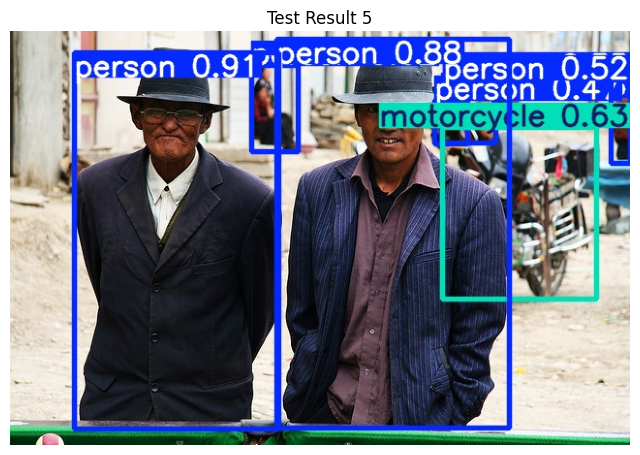

In [ ]:
output_dir = "/content/yolov5/runs/test/yolov5_test"
# Run inference on the test images
!python detect.py --weights {weights_path} --source {test_images_dir} --name yolov5_test --project runs/test --save-txt --save-conf

# Display test results
detected_images = glob.glob(f"{output_dir}/*.jpg")  # Get all detected images

# Display a few detected images
if detected_images:
    for idx, img_path in enumerate(detected_images[:5]):  # first 5 images
        detected_image = Image.open(img_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(detected_image)
        plt.axis("off")
        plt.title(f"Test Result {idx + 1}")
        plt.show()
else:
    print(f"No detected images found in {output_dir}. Check if testing ran successfully.")

In [ ]:
from pathlib import Path
# Paths

min_con = 0.8

# Count objects with confidence >= 0.8
labels_dir = Path(f"{output_dir}/labels")
object_count = 0

if labels_dir.exists():
    for label_file in labels_dir.glob("*.txt"):
        with open(label_file, "r") as f:
            lines = f.readlines()
            for line in lines:
                confidence = float(line.strip().split()[5])  # Confidence score is the 6th value in each line
                if confidence >= min_con:
                    object_count += 1

print(f"Total number of objects with confidence >= {min_con}: {object_count}")


Total number of objects with confidence >= 0.8: 405


In [ ]:
from pathlib import Path
# Paths

min_con = 0.5

# Count objects with confidence >= 0.8
labels_dir = Path(f"{output_dir}/labels")
object_count = 0

if labels_dir.exists():
    for label_file in labels_dir.glob("*.txt"):
        with open(label_file, "r") as f:
            lines = f.readlines()
            for line in lines:
                confidence = float(line.strip().split()[5])  # Confidence score is the 6th value in each line
                if confidence >= min_con:
                    object_count += 1

print(f"Total number of objects with confidence >= {min_con}: {object_count}")


Total number of objects with confidence >= 0.5: 1596
